# K-Mean Cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
# environmental factors.csv
file_path = "environmental factors.csv"  
data = pd.read_csv(file_path)
print("Dataset Preview:")
print(data.head())

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       10000 non-null  float64
 1   humidity          10000 non-null  float64
 2   wind_speed        10000 non-null  float64
 3   carbon_emissions  10000 non-null  float64
 4   solar_irradiance  10000 non-null  float64
 5   pollution_level   10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


In [4]:
data.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [5]:
data.tail()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253
9999,19.342808,40.335889,10.147960,269.340664,875.536039,52.283339


In [8]:
Scaler=StandardScaler()
data_scaled=Scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


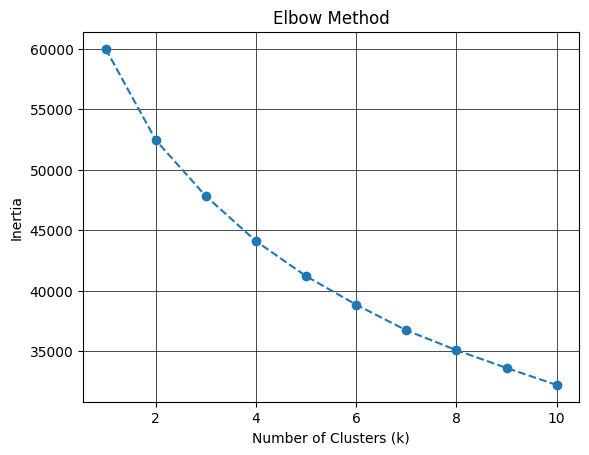

In [26]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o' ,linestyle='--')  # Corrected marker style
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True,color='black', linestyle='-', linewidth=0.5)
plt.show()

In [17]:
data.isnull().sum().sum()

0

In [28]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
data["cluster"] = kmeans.fit_predict(data_scaled)  # Corrected method name

print(data.head())

   temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    22.490802  52.418449   19.599966        337.165056        369.020837   
1    34.014286  49.974726    8.690240        256.681604        185.335998   
2    29.639879  40.569235   11.932794        484.024336        213.723302   
3    26.973170  66.436000   18.265613        148.540303        262.604015   
4    18.120373  58.597450   14.641787        314.535387        283.288001   

   pollution_level  cluster  
0        84.723658        6  
1        49.451704        5  
2        19.546561        6  
3        73.664179        4  
4        41.867814        6  


In [29]:
sil_score=silhouette_score(data_scaled,data['cluster'])
print(f'Silhouwtte Score:{sil_score}')

Silhouwtte Score:0.12205646149181477


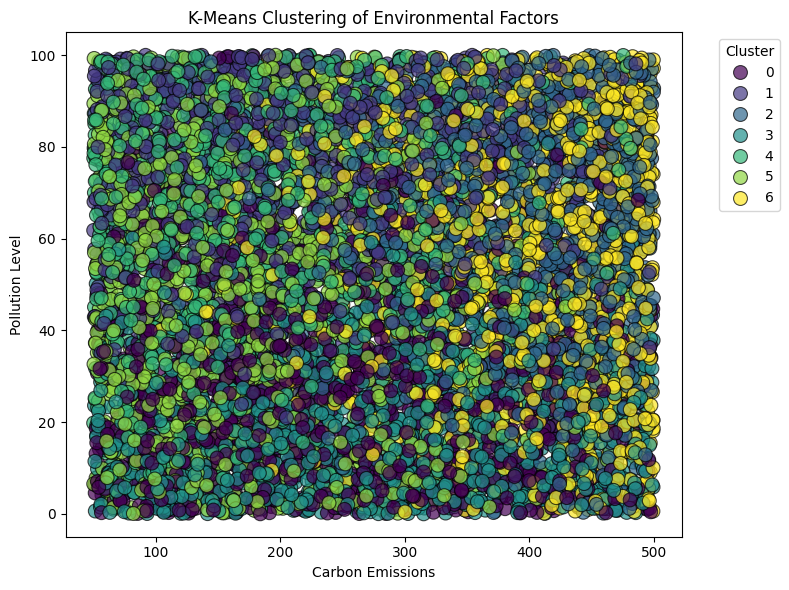

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data already contains the cluster labels (from the KMeans model)
# We'll use two features to plot: 'carbon_emissions' and 'pollution_level'
plt.figure(figsize=(8, 6))

# Create a scatter plot with the cluster labels
sns.scatterplot(x='carbon_emissions', y='pollution_level', hue='cluster',
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')

# Title and labels
plt.title('K-Means Clustering of Environmental Factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
